In [1]:
import numpy as np
import statsrat as sr
from statsrat import rw
from statsrat.expr.predef.pvl_iti import spont_rec

In [2]:
basic = rw.model(name = 'basic',
                 fbase = rw.fbase.elem_intercept,
                 fweight = rw.fweight.none,
                 lrate = rw.lrate.cnst,
                 drate = rw.drate.zero,
                 aux = rw.aux.basic)

decay = rw.model(name = 'decay',
                 fbase = rw.fbase.elem_intercept,
                 fweight = rw.fweight.none,
                 lrate = rw.lrate.cnst,
                 drate = rw.drate.hrmn,
                 aux = rw.aux.basic)

Kalman = rw.model(name = 'Kalman',
                  fbase = rw.fbase.elem_intercept,
                  fweight = rw.fweight.none,
                  lrate = rw.lrate.from_aux_direct,
                  drate = rw.drate.zero,
                  aux = rw.aux.Kalman)

In [3]:
print(basic.pars)
print(decay.pars)
print(Kalman.pars)

            min   max  default
lrate       0.0   1.0      0.2
resp_scale  0.0  10.0      1.0
              min   max  default
extra_counts  1.0  10.0      5.0
lrate         0.0   1.0      0.2
resp_scale    0.0  10.0      1.0
            min   max  default
drift_var   0.0   2.0     0.01
u_var       0.0   5.0     0.10
w_var0      0.0  10.0     1.00
resp_scale  0.0  10.0     1.00


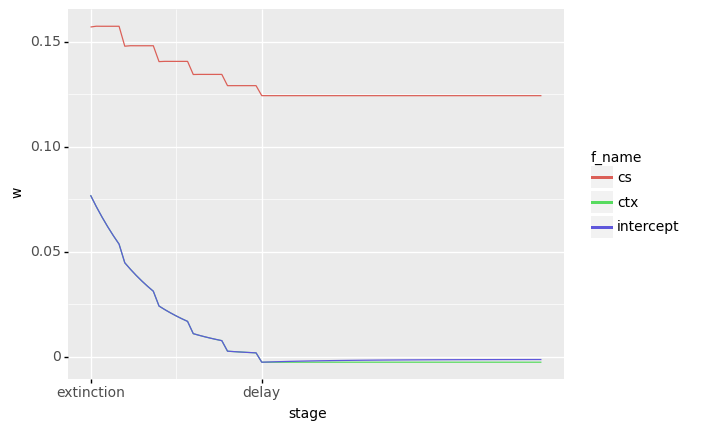

<ggplot: (304649650)>

In [4]:
model_name = 'Kalman'

model = {'basic': basic,
         'decay': decay,
         'Kalman': Kalman}
par_val = {'basic': [0.2, 1],
           'decay': [1, 0.2, 1],
           'Kalman': [0.1, 5, 2, 1]}

# [0.1, 5, 2, 1]

trials = spont_rec.make_trials(schedule = 'experimental')
ds = model[model_name].simulate(trials, par_val = par_val[model_name])
#sr.learn_plot(ds, var = 'u_hat')
sr.learn_plot(ds, var = 'w', sel = {'f_name': ['ctx', 'cs', 'intercept'], 't': ds['stage_name'].isin(['extinction', 'delay'])})